In [157]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler, MinMaxScaler

LOADING THE DATA ⏳

In [158]:
dataset = pd.read_csv('boston.csv')
dataset.head(507)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48,22.0


In [159]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


In [177]:
dataset.isnull().sum()
dataset.duplicated().sum()

np.int64(0)

EXPLORATORY DATA ANALYSIS (EDA) 📈📊

In [161]:
dataset.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


array([[<Axes: title={'center': 'CRIM'}>, <Axes: title={'center': 'ZN'}>,
        <Axes: title={'center': 'INDUS'}>,
        <Axes: title={'center': 'CHAS'}>],
       [<Axes: title={'center': 'NOX'}>, <Axes: title={'center': 'RM'}>,
        <Axes: title={'center': 'AGE'}>, <Axes: title={'center': 'DIS'}>],
       [<Axes: title={'center': 'RAD'}>, <Axes: title={'center': 'TAX'}>,
        <Axes: title={'center': 'PTRATIO'}>,
        <Axes: title={'center': 'B'}>],
       [<Axes: title={'center': 'LSTAT'}>,
        <Axes: title={'center': 'MEDV'}>, <Axes: >, <Axes: >]],
      dtype=object)

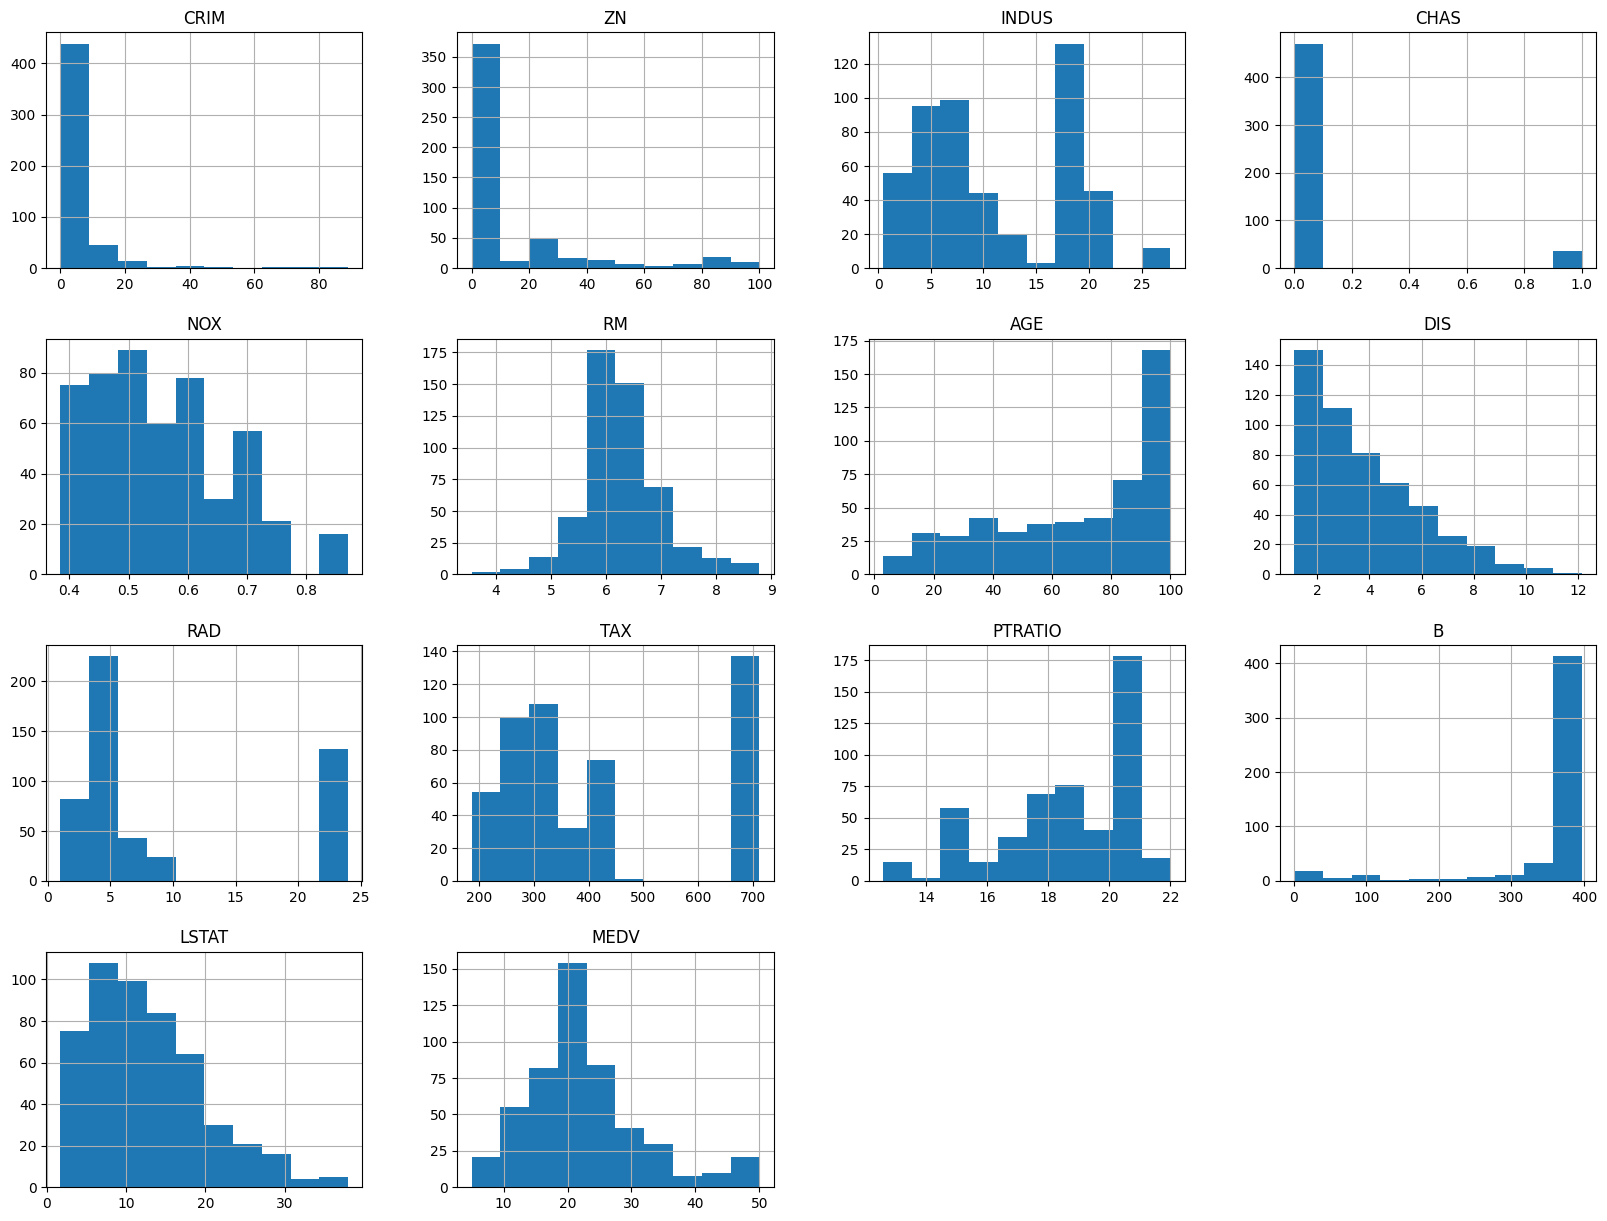

In [162]:
#now histogram
dataset.hist(figsize=(20,15))

Text(0, 0.5, 'Values')

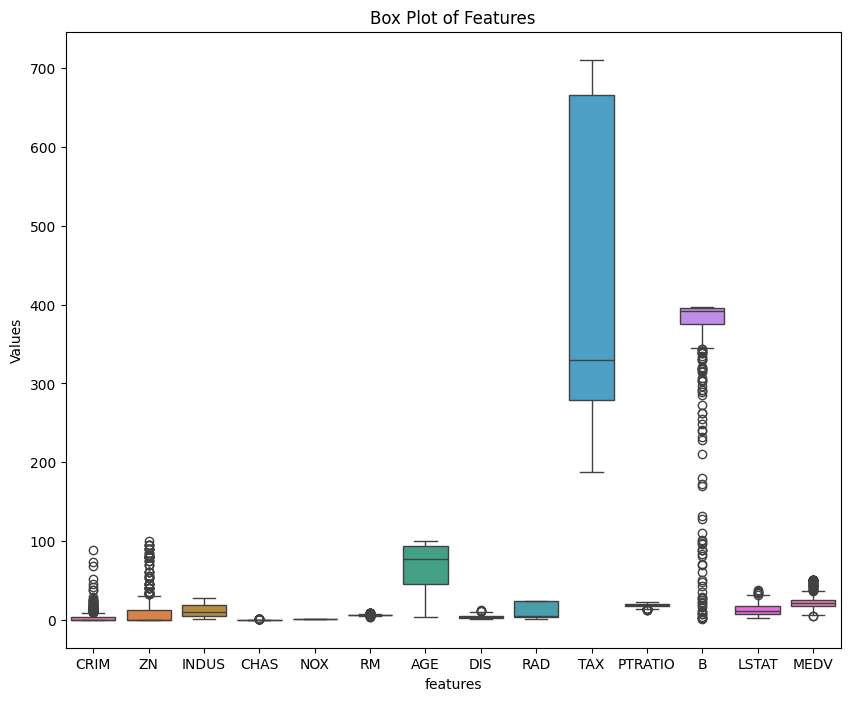

In [163]:
# box plots and remove outliers
plt.figure(figsize=(10,8))
sns.boxplot(data=dataset)
plt.title('Box Plot of Features')
plt.xlabel('features')
plt.ylabel('Values')

In [164]:
# remove outliers using IQR method
Q1 = dataset.quantile(0.25)
Q3 = dataset.quantile(0.75)
IQR = Q3 - Q1
dataset = dataset[(dataset >= Q1 - 1.5 * IQR) & (dataset <= Q3 + 1.5 * IQR)]

Text(0, 0.5, 'Values')

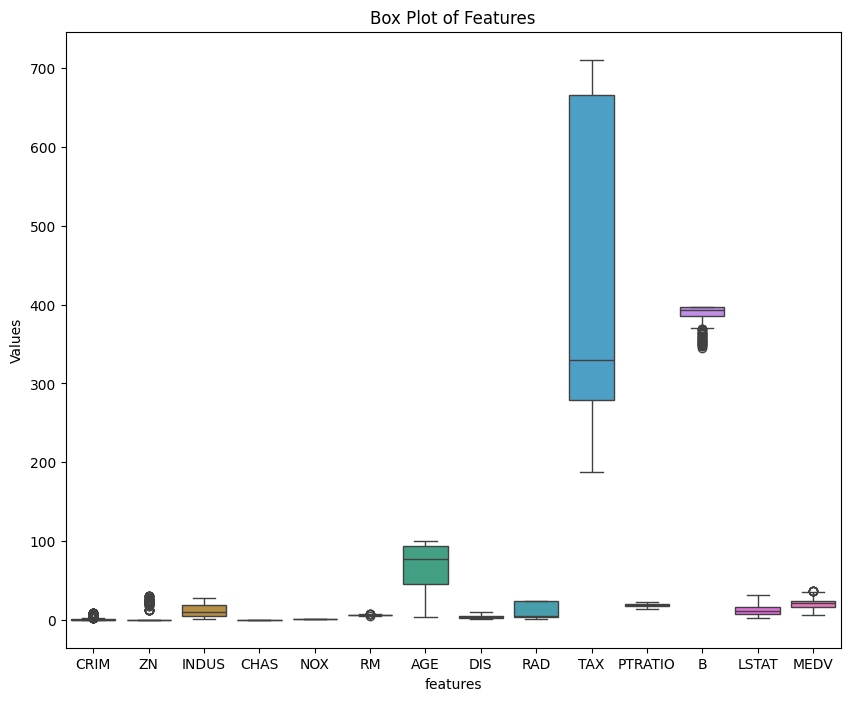

In [165]:
#now again box plot
plt.figure(figsize=(10,8))
sns.boxplot(data=dataset)
plt.title('Box Plot of Features')
plt.xlabel('features')
plt.ylabel('Values')

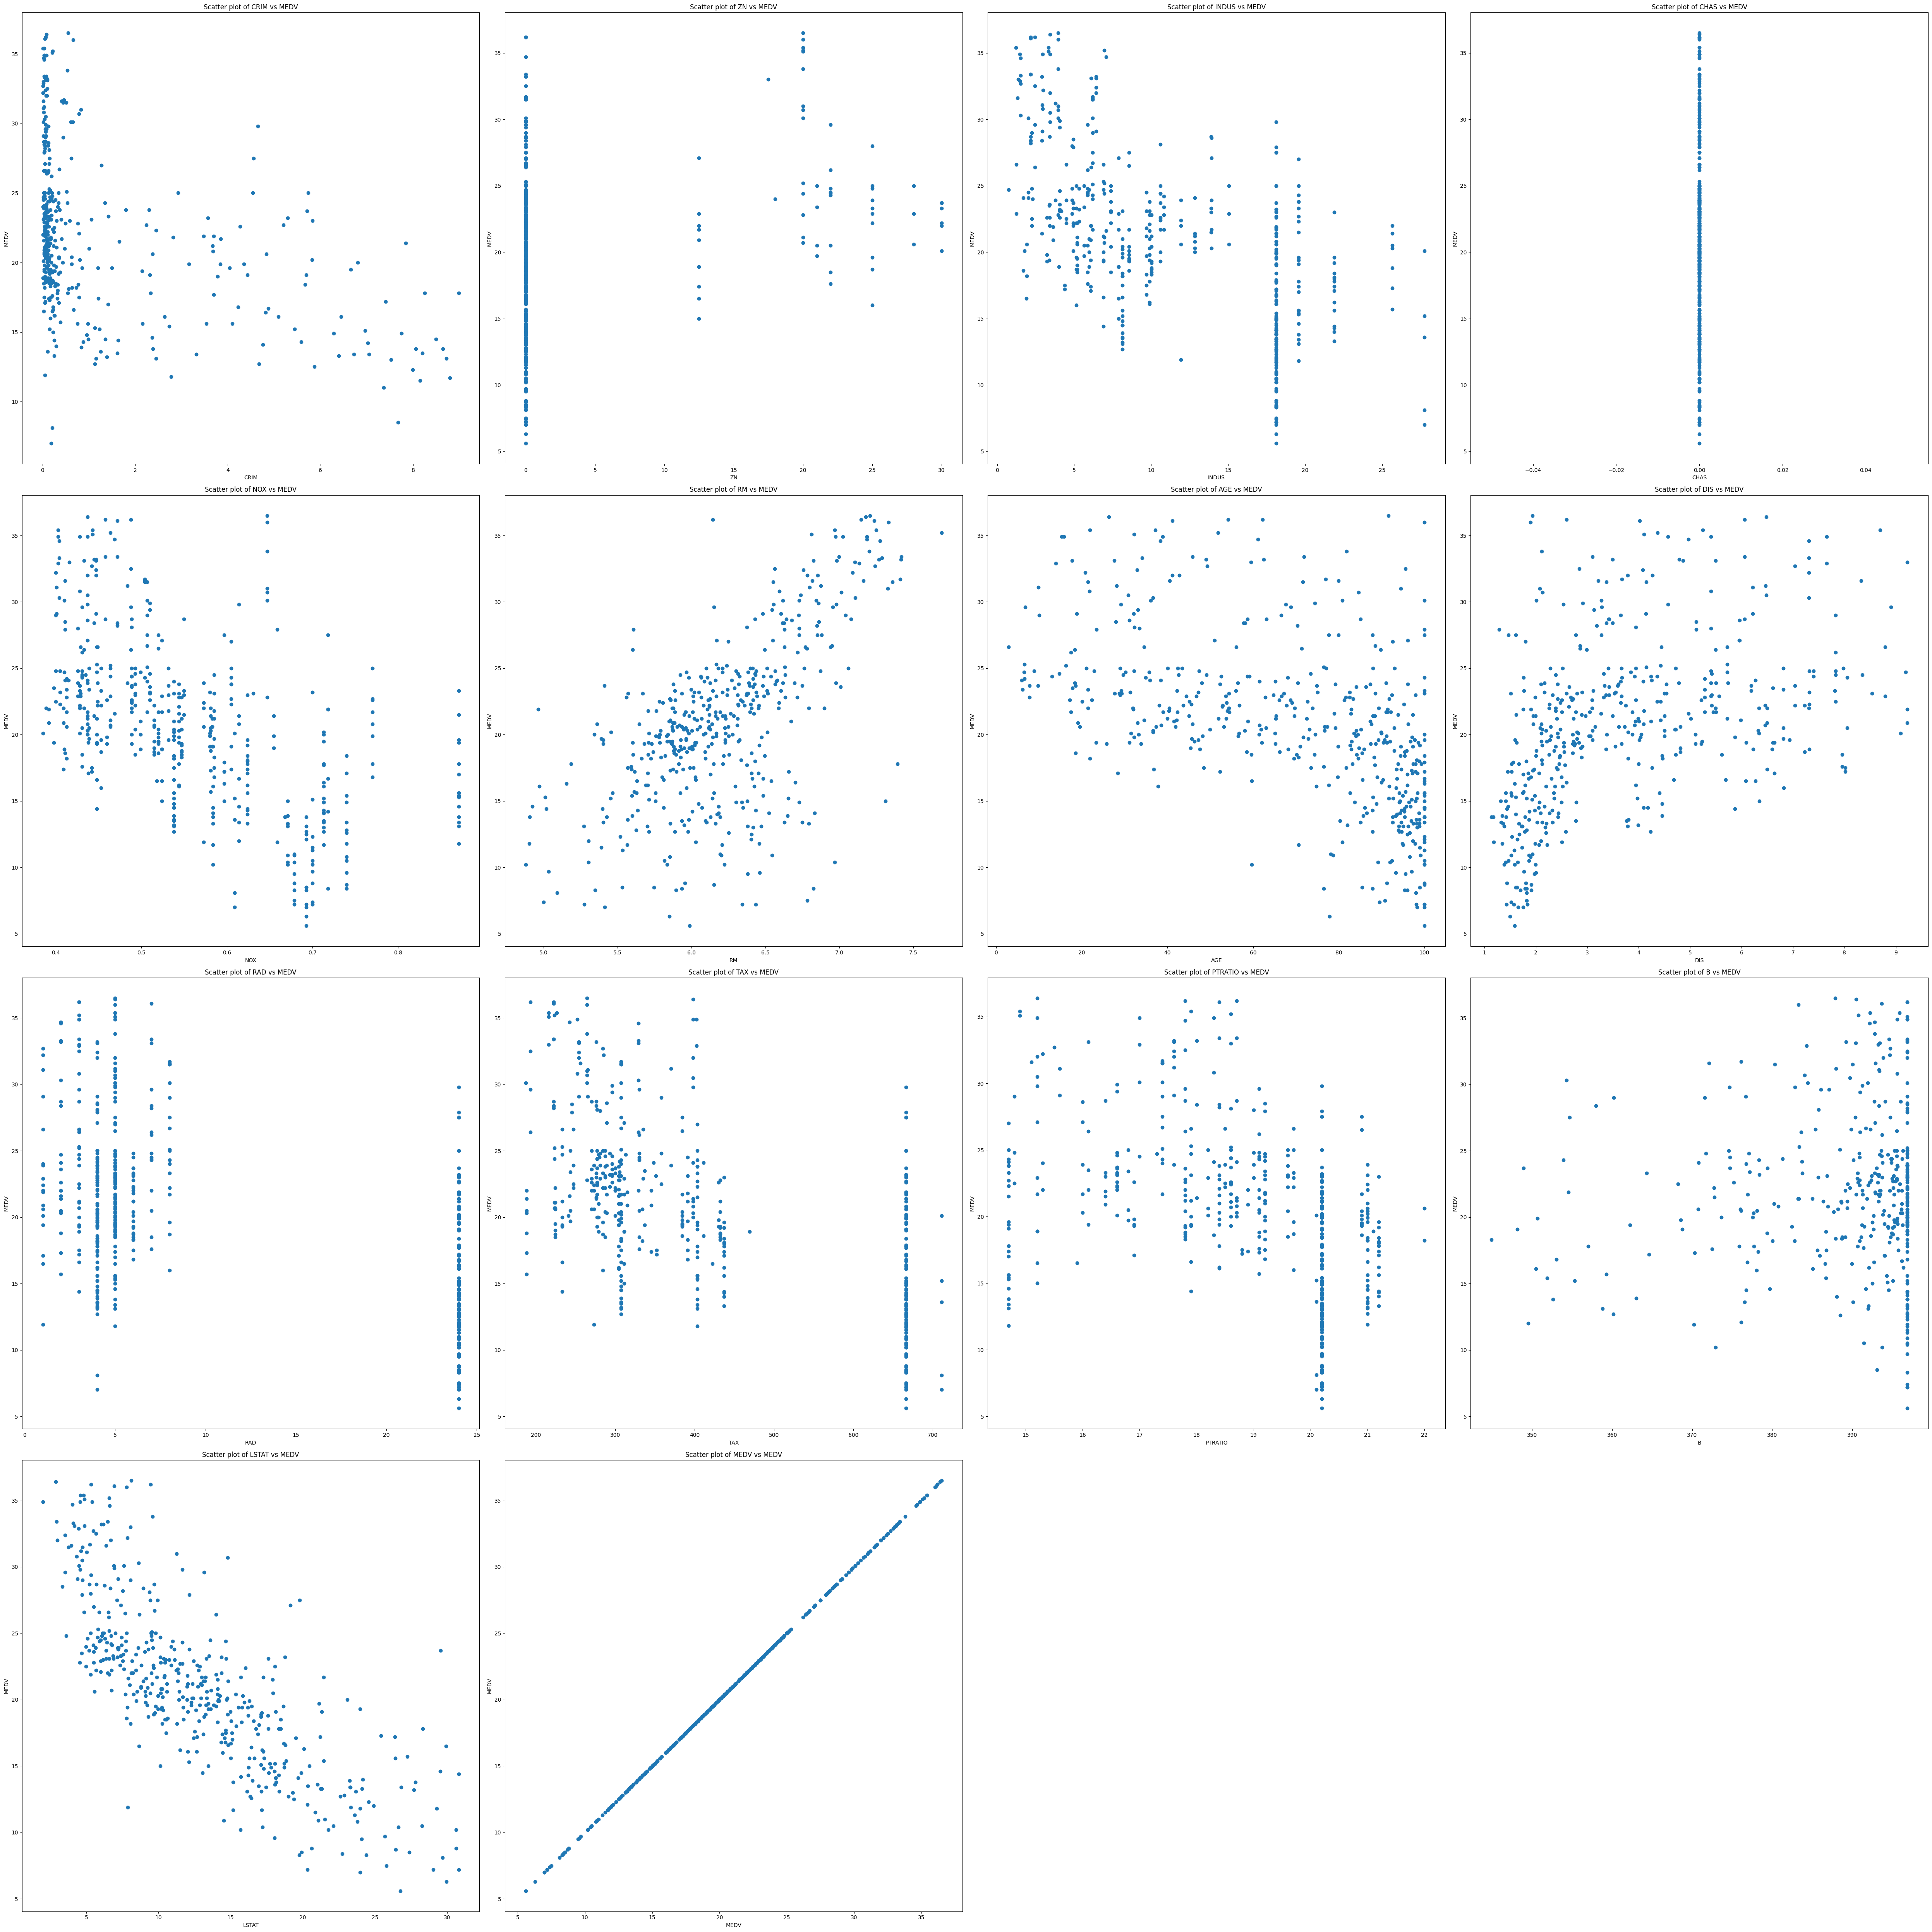

In [166]:
#now plotting scatter plots 
#target is MEDV
plt.figure(figsize=(50, 50))
features = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
for i in range(len(features)):
    plt.subplot(4, 4, i + 1)
    plt.scatter(dataset[features[i]], dataset['MEDV'])
    plt.xlabel(features[i])
    plt.ylabel('MEDV')
    plt.title('Scatter plot of '+ features[i] +' vs MEDV')
plt.tight_layout()
plt.show()

In [167]:
# correlation matrix
correlation_matrix = dataset.corr()
correlation_matrix

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
CRIM,1.000000,-0.240417,0.570677,NaN,0.622629,-0.139521,0.424362,-0.453886,0.898057,0.820845,0.292967,-0.191348,0.370058,-0.416454
ZN,-0.240417,1.000000,-0.413333,NaN,-0.353646,0.222608,-0.334883,0.526612,-0.232687,-0.336210,-0.206509,0.061239,-0.275217,0.299573
INDUS,0.570677,-0.413333,1.000000,NaN,0.763651,-0.384093,0.644779,-0.710742,0.595129,0.720760,0.337121,-0.170926,0.603915,-0.612220
CHAS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NOX,0.622629,-0.353646,0.763651,NaN,1.000000,-0.312085,0.731470,-0.779518,0.611441,0.668023,0.237800,-0.167082,0.594200,-0.569014
RM,-0.139521,0.222608,-0.384093,NaN,-0.312085,1.000000,-0.265562,0.256263,-0.127761,-0.214785,-0.186830,0.064502,-0.569140,0.614818
AGE,0.424362,-0.334883,0.644779,NaN,0.731470,-0.265562,1.000000,-0.750649,0.456022,0.506456,0.311267,-0.090729,0.605332,-0.557098
DIS,-0.453886,0.526612,-0.710742,NaN,-0.779518,0.256263,-0.750649,1.000000,-0.504962,-0.552740,-0.323843,0.109102,-0.487045,0.459263
RAD,0.898057,-0.232687,0.595129,NaN,0.611441,-0.127761,0.456022,-0.504962,1.000000,0.910228,0.470248,-0.133338,0.471069,-0.504338
TAX,0.820845,-0.336210,0.720760,NaN,0.668023,-0.214785,0.506456,-0.552740,0.910228,1.000000,0.451943,-0.148727,0.530083,-0.590236


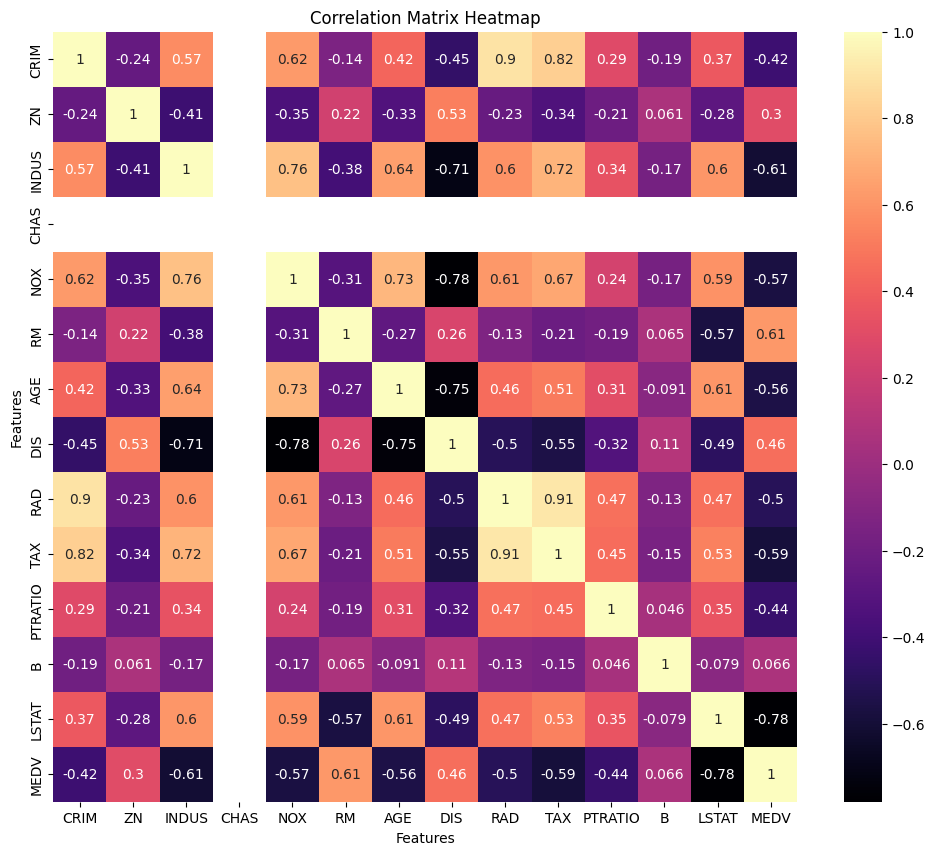

In [168]:
# now heatmapp for the above correlation 
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot = True, cmap = 'magma')
plt.title('Correlation Matrix Heatmap')
plt.xlabel('Features')
plt.ylabel('Features')
plt.show()

TRAINING THE MODEL 🏋💪

In [169]:
dataset = dataset.dropna()  # Drop rows with NaN values if any
X = dataset.drop('MEDV', axis=1)
Y = dataset['MEDV']
#print(X)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 42)
#print (X_train)
#print (X_test)
# scaling the data by standardization
standard_scaler = StandardScaler()
X_train_scaled = standard_scaler.fit_transform(X_train)
X_test_scaled = standard_scaler.transform(X_test)
#print(X_train_scaled)
print(X_test_scaled)

[[-0.22198266 -0.46090321  1.78192746  0.          0.95684492  0.46665839
   1.20372627 -0.94783826 -0.44993511  0.51742837  1.42961599 -0.32381303
  -0.14176774]
 [-0.47880554 -0.46090321 -0.82708177  0.         -0.18679364 -0.48876024
  -0.26014877  0.43989553 -0.30426776 -0.96276618  0.83149708  0.71840074
  -0.48060863]
 [-0.02840582 -0.46090321 -0.36620888  0.          0.05452458 -0.85531937
   1.28175006  0.03945882 -0.44993511 -0.38597675  1.30999221  0.49760859
   1.48022475]
 [ 0.61565333 -0.46090321  1.42104055  0.          0.75749507 -0.69687123
   1.18143375 -0.91360288 -0.30426776  0.28115318 -2.45815692 -3.8443251
   0.02672692]
 [-0.23766297 -0.46090321  1.78192746  0.          0.95684492  0.37915718
   1.21487252 -1.06886286 -0.44993511  0.51742837  1.42961599  0.50977087
   0.93956059]
 [-0.46373747  2.98179444 -0.86770107  0.         -1.09960607  1.02004444
  -0.86576204  1.20932601 -0.15860042 -0.43462165 -1.32173099 -0.5090539
  -0.83611383]
 [ 1.28582529 -0.4609032

In [170]:
#training on dataset
model = LinearRegression()
model.fit(X_train_scaled, Y_train)

LinearRegression()

In [171]:
#prediction on test data
Y_original = Y_test
print("Original Values: ", Y_original.values, 'ً\n')
Y_predicted = model.predict(X_test_scaled)
print("Predicted Values: ", Y_predicted, 'ً\n')

Original Values:  [23.  18.7 14.5 19.1 18.1 23.3 17.7 23.2 18.9 28.  17.8 28.4 22.9 20.3
 16.6 23.9 21.7 28.6 20.3 14.3 19.5 18.9 19.4 23.1 21.4 19.4 17.2 23.4
 23.  11.8 25.  22.6 22.9 23.2 31.7 26.5 17.4 18.4 21.1 15.4 13.6 18.7
 17.6 19.9 22.8 19.8 28.7 19.9 21.8 23.4 29.8 19.1 24.7 23. ] ً

Predicted Values:  [18.43483983 22.13188435 14.86736483 19.09925156 17.53256323 26.08443252
 21.45464962 25.01736    22.3120619  26.0141145  13.62538614 25.52546413
 24.85228451 21.62057963 15.86533283 23.49746248 23.87733036 28.00997902
 21.28305736 13.81378293 17.06164519 20.1216111  19.1720469  24.26551218
 21.19523745 18.56682189 17.11612783 23.74888747 24.49685433 12.13383031
 26.81346988 23.41716482 22.72112554 22.37849569 31.23696493 24.13748006
 15.92969281 19.57322666 23.0047767  16.28297991 13.21794131 20.10653933
 15.77911634 19.46579118 25.26665399 20.95518106 26.85558913 19.00865411
 20.69989526 24.38427174 24.64614647 17.80571713 23.58630015 19.85445019] ً



EVALUATION METRICSS 🗿

In [172]:
#calculating accuracy
mse = mean_squared_error(Y_original, Y_predicted)
print("Mean Squared Error: ", mse, 'ً\n')
rmse = np.sqrt(mse)
print("Root Mean Squared Error: ", rmse, 'ً\n')
r2_accuracy_score = model.score(X_test_scaled, Y_test)
print("R2 Score: ", r2_accuracy_score * 100)

Mean Squared Error:  3.728131883981837 ً

Root Mean Squared Error:  1.9308370941075885 ً

R2 Score:  78.30668323108956


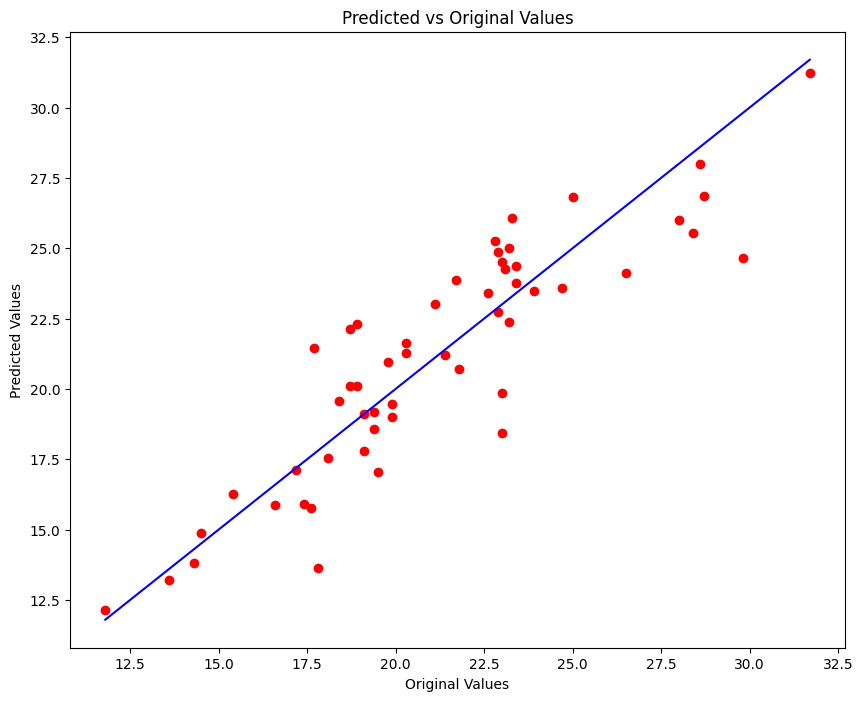

In [173]:
plt.figure(figsize=(10, 8))
plt.scatter(Y_original, Y_predicted, color = 'red')
plt.plot([Y_original.min(), Y_original.max()], [Y_original.min(), Y_original.max()], '-', color = 'blue')
plt.title('Predicted vs Original Values')
plt.xlabel('Original Values')
plt.ylabel('Predicted Values')
plt.show()

In [176]:
import joblib as jl
jl.dump(model, 'linear_regression_model.pkl')
jl.dump(standard_scaler, 'scaler1.pkl')

['scaler1.pkl']